# 📊 Intern Performance Prediction using Machine Learning

This project uses **Logistic Regression** and **Random Forest Classifier** to predict intern performance based on behavioral and productivity metrics such as attendance rate, task completion rate, feedback scores, and more.

## 🧹 Step 1: Load & Preprocess Dataset

We begin by importing necessary libraries and loading the dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("intern_performance_dataset.csv")

## 🧠 Step 2: Encode Categorical Columns

We use Label Encoding to convert categorical features like `department` and `interaction_level` into numeric format so that machine learning algorithms can process them.

In [2]:
# Encode department and interaction level
le = LabelEncoder()
df['department_encoded'] = le.fit_transform(df['department'])
df['interaction_level_encoded'] = le.fit_transform(df['interaction_level'])

## 🧮 Step 3: Select Features and Target

We define the features that will be used to train the model and select the target variable `performance_label`, which we want to predict.


In [3]:
features = [
    'attendance_rate',
    'task_completion_rate',
    'avg_feedback_score',
    'hours_per_week',
    'final_assessment_score',
    'department_encoded',
    'interaction_level_encoded'
]
target = 'performance_label'

X = df[features]
y = df[target]

## 📏 Step 4: Scale the Features

To normalize the data, we use `StandardScaler` so that each feature contributes equally to model performance.


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🧪 Step 5: Train/Test Split

We split our dataset into training and testing subsets using an 80/20 ratio to evaluate model performance fairly.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("✅ Data ready for training")

✅ Data ready for training


## 🤖 Step 6: Train Models (Logistic Regression & Random Forest)

We train two popular machine learning models:
- Logistic Regression
- Random Forest Classifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## 📊 Step 7: Model Evaluation

We evaluate both models using:
- Accuracy
- Precision
- Recall
- F1-score

The `classification_report` shows detailed metrics for each model's performance on the test set.


In [7]:
from sklearn.metrics import classification_report

print("📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("\n📊 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

📊 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1727
           1       0.71      0.51      0.60       273

    accuracy                           0.91      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.90      0.91      0.90      2000


📊 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1727
           1       1.00      1.00      1.00       273

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## 📉 Step 8: Confusion Matrix

We visualize the confusion matrix for the **Random Forest Classifier** to better understand the model's classification performance.


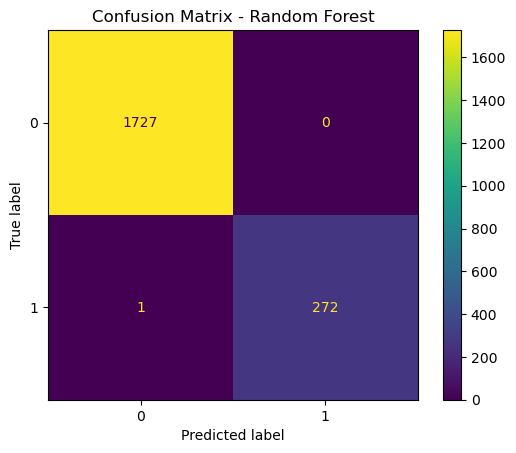

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 📌 Step 9: Feature Importance (Random Forest)

We use the feature importances generated by the Random Forest model to identify which variables contribute most to predicting intern performance. This helps mentors focus on the most influential performance factors.


C:\Users\Other User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


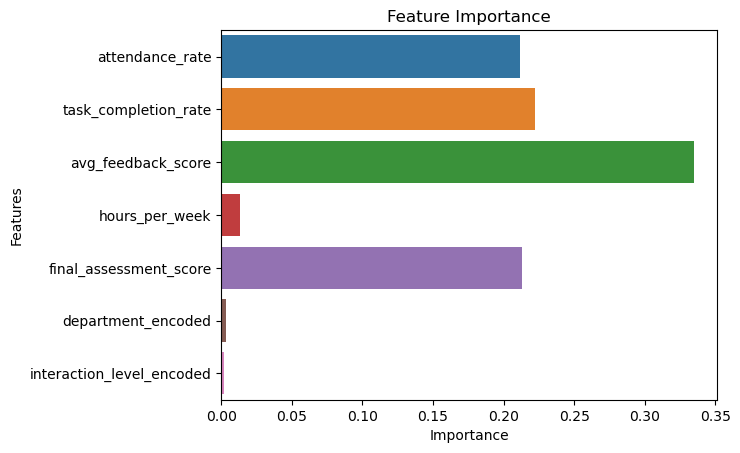

In [9]:
import seaborn as sns

importances = rf.feature_importances_
feature_names = features

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

✅ **End of Notebook**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("intern_performance_dataset.csv")

# Encode categorical column
le = LabelEncoder()
df['department_encoded'] = le.fit_transform(df['department'])
df['interaction_level_encoded'] = le.fit_transform(df['interaction_level'])

# Select features and target
features = [
    'attendance_rate',
    'task_completion_rate',
    'avg_feedback_score',
    'hours_per_week',
    'final_assessment_score',
    'department_encoded',
    'interaction_level_encoded'
]
target = 'performance_label'

X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Data ready for training")


✅ Data ready for training


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("\n📊 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


📊 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1727
           1       0.71      0.51      0.60       273

    accuracy                           0.91      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.90      0.91      0.90      2000


📊 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1727
           1       1.00      1.00      1.00       273

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [4]:
import joblib

# Save model and scaler
joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']